In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips=sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
titanic=pd.read_csv('Titanic.csv')

In [5]:
iris=pd.read_csv('IRIS.csv')

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
flights=pd.read_csv('AirPassengers.csv')

In [16]:
flights.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# 1. Scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

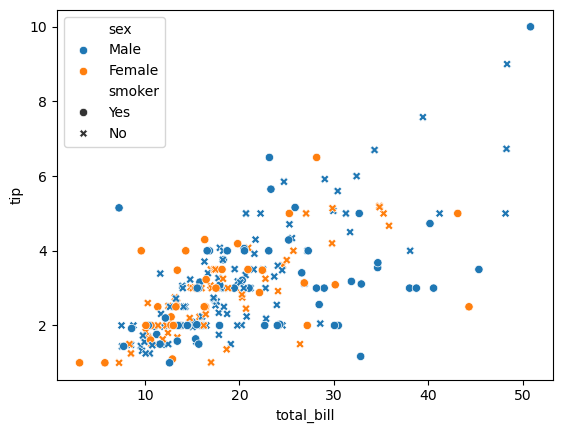

In [31]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue=tips['sex'],style=tips['smoker'])

# 2. Bar Plot (Numerical - Categorical)

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

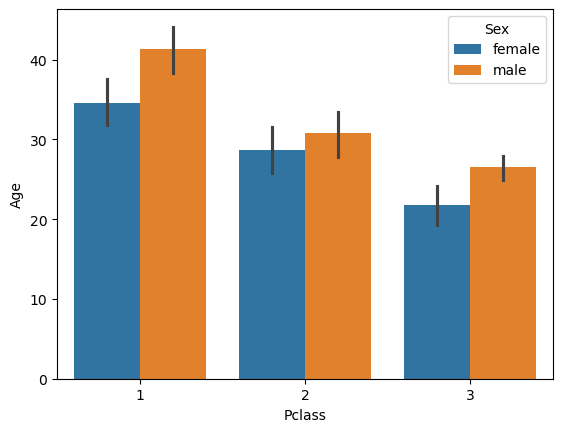

In [38]:
sns.barplot(x='Pclass',y='Age',data=titanic,hue=titanic['Sex'])

# 3. Box Plot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

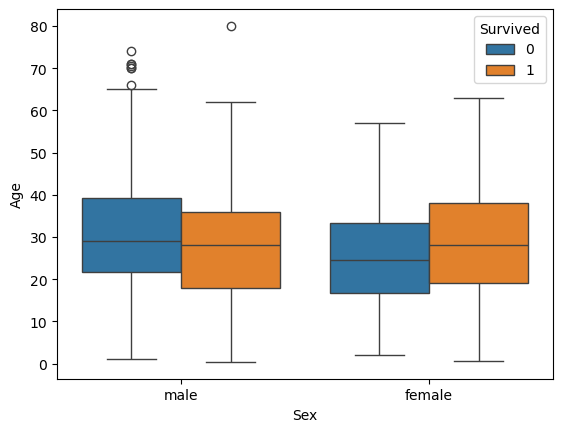

In [41]:
sns.boxplot(x='Sex',y='Age',hue=titanic['Survived'],data=titanic)

# 4. Distplot (Numerical - Categorical)

<Axes: xlabel='Age', ylabel='Density'>

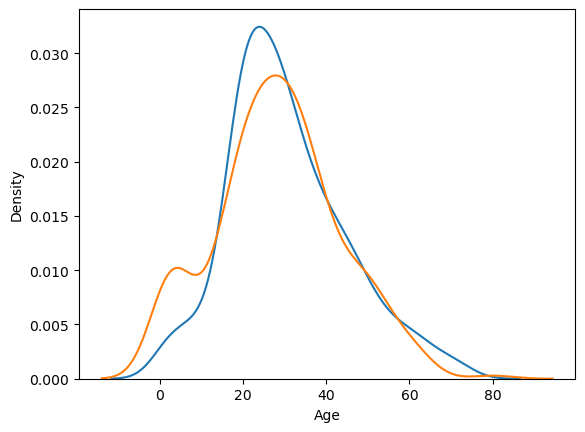

In [48]:
sns.kdeplot(data=titanic[titanic['Survived'] == 0]['Age'])
sns.kdeplot(data=titanic[titanic['Survived'] == 1]['Age'])

# 5. HeatMap (Categorical - Categorical)

In [49]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

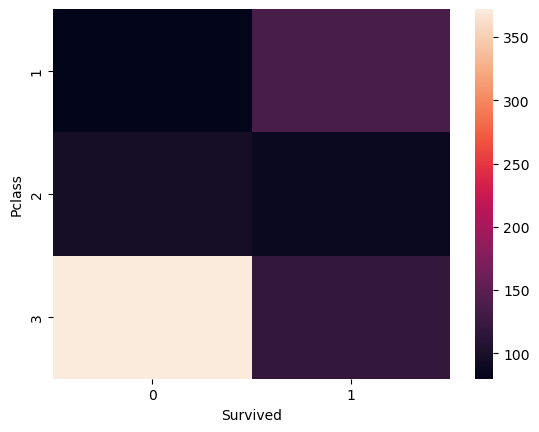

In [50]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

In [55]:
titanic.groupby('Embarked')['Survived'].mean() * 100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

# 6. ClusterMap (Categorical - Categorical)

In [56]:
pd.crosstab(titanic['Parch'],titanic['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


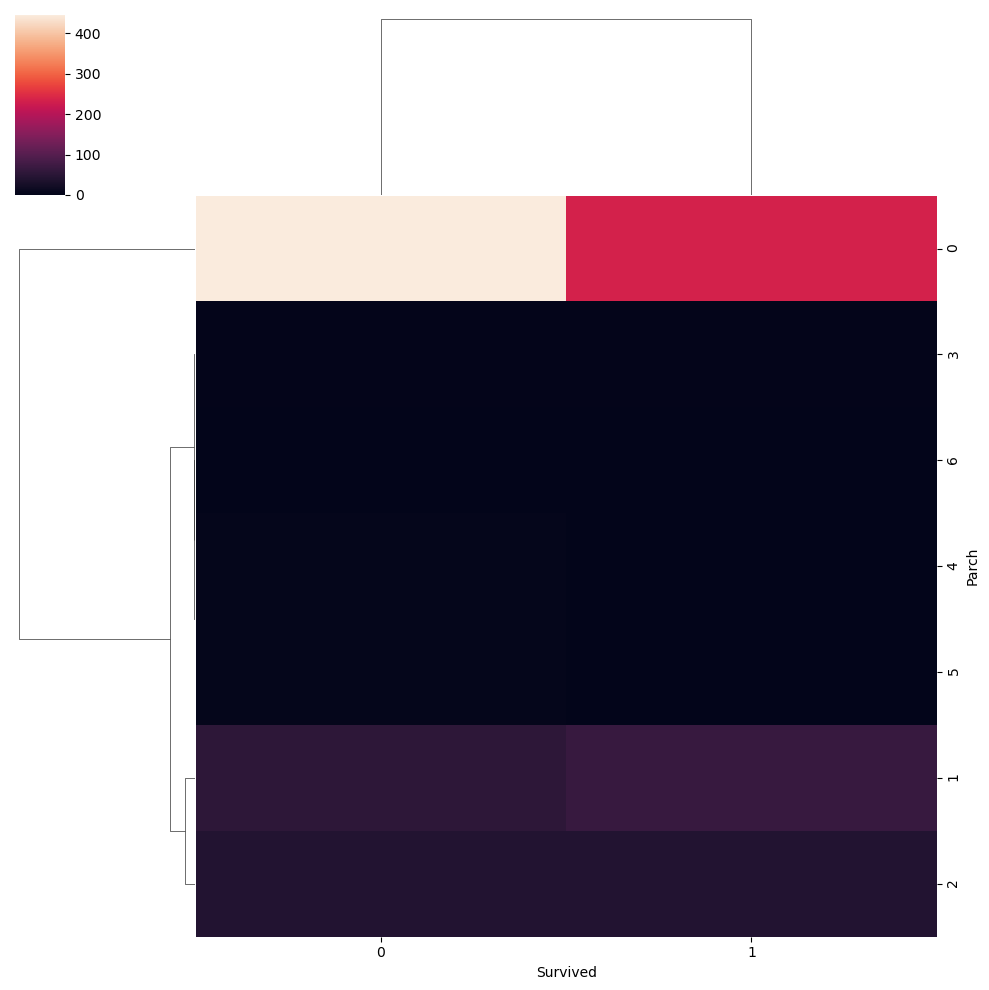

In [6]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

# 7. Pairplot

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


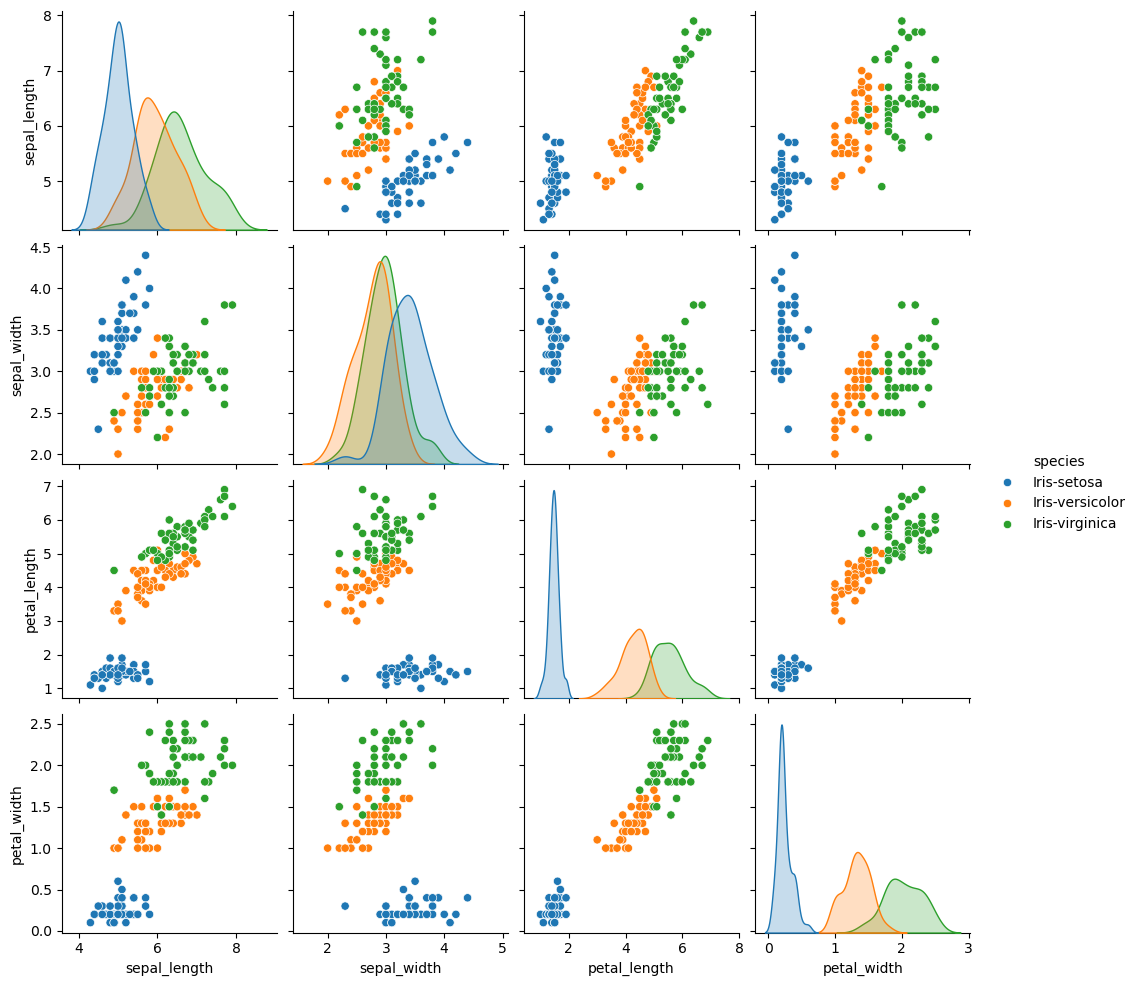

In [8]:
sns.pairplot(iris,hue='species')

# 8. Lineplot (Numerical - Numerical)

In [11]:
flights.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
flights['Month'] = pd.to_datetime(flights['Month'])

In [21]:
flights['Year'] = flights['Month'].dt.year

In [22]:
flights['Month_name'] = flights['Month'].dt.strftime('%b')


In [23]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

In [24]:
flights['Month_name'] = pd.Categorical(
    flights['Month_name'],
    categories=month_order,
    ordered=True
)


In [25]:
flights = flights.rename(columns={'#Passengers': 'Passengers'})

In [28]:
flights = flights[['Year', 'Month_name', 'Passengers']]

flights.head()

,Year,Month_name,Passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [36]:
new = flights.groupby('Year', as_index=False)['Passengers'].sum()


<Axes: xlabel='Year', ylabel='Passengers'>

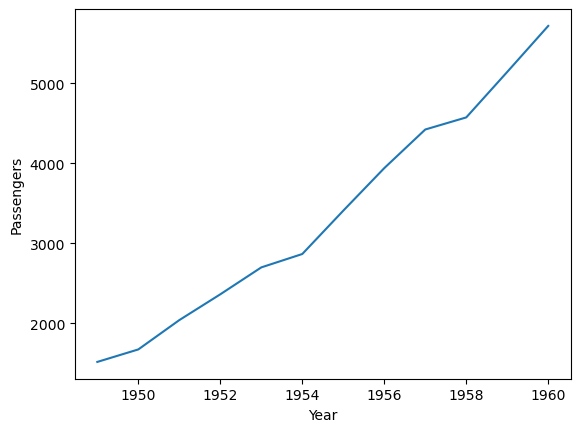

In [38]:
sns.lineplot(x='Year', y='Passengers', data=new)


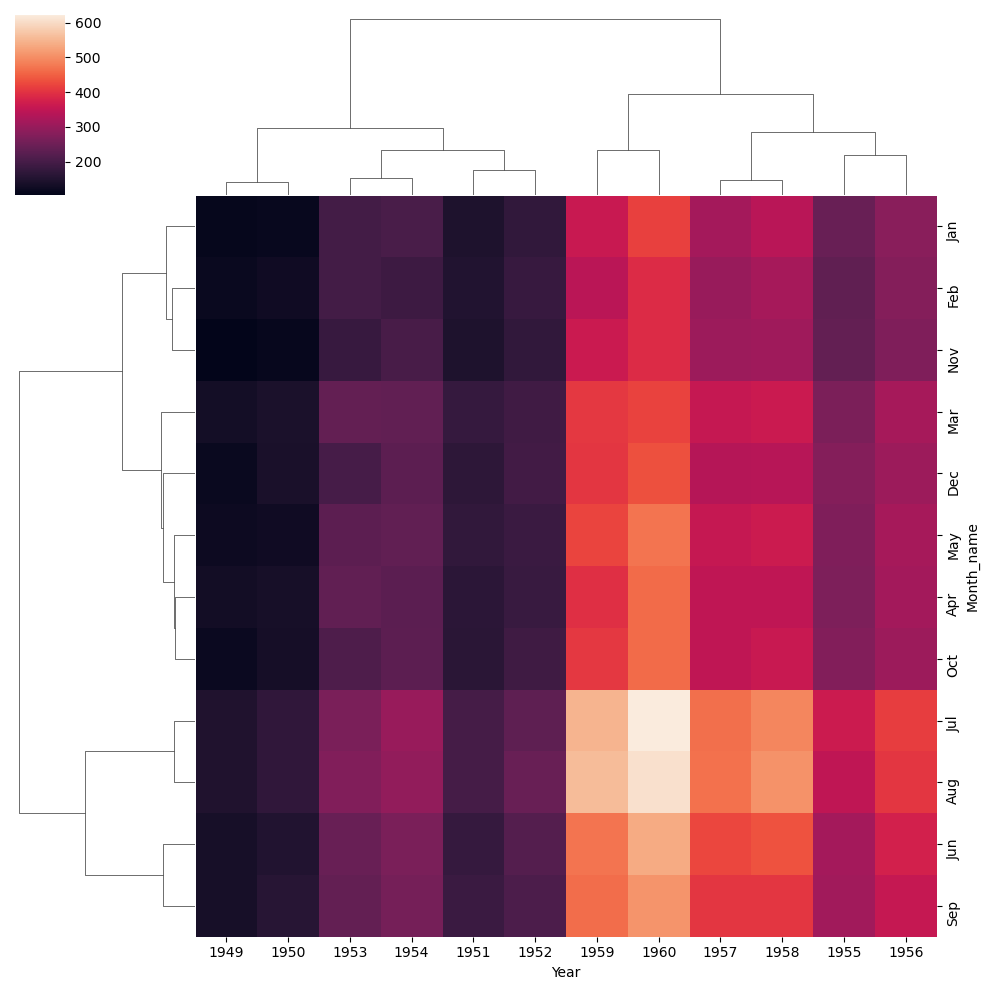

In [41]:
sns.clustermap(
    flights.pivot_table(
        values='Passengers',
        index='Month_name',
        columns='Year',
        observed=False
    )
)
